# Analysis

## Test Set 1

For the small test set, one can generate all possible conversions recursively and select the one with the smallest number of rule violations as the answer. Since each note can be converted to four possible notes in the alien scale, this results into **4<sup>K</sup>** combinations to be tested and O(**4<sup>K</sup>**) time complexity.

## Test Set 2

**Dynamic Programming Solution** <br>
Let DP[i, j] be the minimum number of rule violations required to convert the first i notes A1, A2, ..., Ai such that the i-th note Ai is converted to note j of the alien piano (1 ≤ j ≤ 4). Then the answer is the minimum DP[K, j] over all j, 1 ≤ j ≤ 4.<br>
The table DP[i, j] can be computed using dynamic programming as follows.
(1) DP[1, j] = 0 for all j.<br>
(2) For i > 1, DP[i, j] = min{ DP[i - 1, j'] + P(i, j', j) | 1 ≤ j' ≤ 4 }. Here P(i, j', j) is a binary penalty term accounting for a rule violation between the notes Ai-1 and Ai. For example, if Ai-1 > Ai, then P(i, j', j) = 1 whenever j' ≤ j and P(i, j', j) = 0 otherwise.<br>
Since each entry of the table is calculated using a constant number of operations, the overall time complexity of the algorithm is O(K), which is okay to pass the large test set.

## Greedy Solution

Let us say that a sequence of pitches is playable if it can be converted to the alien piano notes without violating any rules. Our goal here is to split the given sequence of pitches into as few playable fragments as possible.

We can take the longest playable prefix of the sequence as the first fragment of the split. In this way, the remainder of the sequence is as short as possible, and therefore requires potentially fewer rule violations.

Now let us characterise the playable sequences. Note that repeated notes of the same pitch do not affect the playability of the sequence, therefore, without loss of generality, suppose that any two consecutive notes are at a different pitch. Let us say that two consecutive notes form an upward step if the second note has a higher pitch than the first. Otherwise, we call it a downward step.

Clearly, a sequence of notes is not playable if it contains more than three consecutive upward or downward steps, as we would run out of the alien scale. Otherwise, the sequence is playable and we can convert it using this simple strategy (assuming the note names A, B, C, and D of the alien piano from the lowest to the highest note): <br>
(1) If the first step is upward, convert the first note to A.<br>
(2) If the first step is downward, convert the first note to D.<br>
(3) If three consecutive notes form an upward step followed by a downward step, convert the second note to D.<br>
(4) If three consecutive notes form a downward step followed by an upward step, convert the second note to A.<br>
(5) In all other cases, convert a note one step higher or lower than the note before depending on whether they form an upward or downward step.

Since any maximal sequence of upward steps starts at A and has no more than three steps (and similarly for any maximal sequence of downward steps), we will never leave the alien scale.
The following diagram illustrates the process of splitting the sequence (1, 8, 9, 7, 6, 5, 4, 3, 2, 1, 3, 2, 1, 3, 5, 7) into two playable fragments. Since the subsequence (9, 7, 6, 5, 4) consists of four downward steps, the sequence needs to be split between notes 5 and 4.


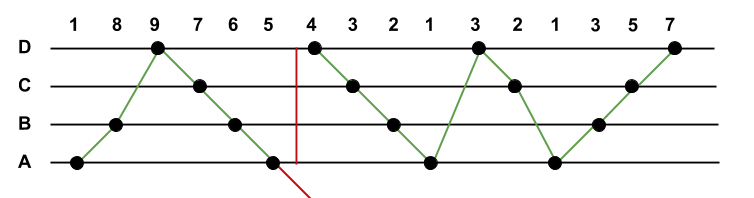

According to the analysis above, a single pass through the given sequence of notes maintaining the current number of consecutive upward and downward steps results in an O(K) solution, where K is the number of notes in the sequence. As soon as the number of upward or downward steps exceeds 3, we have to split the sequence by violating the rules and start a new fragment. A Python code snippet is included below for clarity.


In [ ]:
def solve():
  k = input()
  a = map(int, raw_input().split())
  # Filter out repeated notes.
  a = [a[i] for i in xrange(0, k) if i == 0 or a[i - 1] != a[i]]
  upCount = 0
  downCount = 0
  violations = 0
  for i in xrange(1, len(a)):
    if a[i] > a[i - 1]:
      upCount += 1
      downCount = 0
    else:
      downCount += 1
      upCount = 0
    if upCount > 3 or downCount > 3:
      violations += 1
      upCount = downCount = 0
  return violations